# Regresión Lineal III. Covarianza y Correlación

In [8]:
import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,8)
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats
from scipy.stats import levene
from itertools import combinations
import researchpy as rp
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv("../data/sephora2.csv", index_col = 0)
df.head(1)

,brand,category,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer
0,Acqua Di Parma,Fragrance,4.0,4,3002,66.0,75.0,Yes,No,No,No


En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.
1. Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación? 

Ambas indican la dirección de la variable, si es positiva y negativa, pero la correlación además también nos indica la fuerza de esa relación.


2. Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.


In [10]:
# Creamos un DataFrame con las variables numéricas.

numericas = df.select_dtypes(include=['int64', 'float64'])

In [11]:
# Sacamos la covarianza.

numericas.cov()

,rating,number_of_reviews,love,price,value_price
rating,1.348444,3.558024e+01,1.529866e+03,0.330729,-2.763360
number_of_reviews,35.580241,9.143527e+04,2.582003e+06,-630.215741,-904.325130
love,1529.865594,2.582003e+06,1.186207e+08,-1169.215053,-11208.678840
price,0.330729,-6.302157e+02,-1.169215e+03,2890.517087,2867.055725
value_price,-2.763360,-9.043251e+02,-1.120868e+04,2867.055725,2969.702462


In [12]:
# Sacamos la correlación, por defecto nos indica la correlación de Pearson.

numericas.corr()

,rating,number_of_reviews,love,price,value_price
rating,1.000000,0.101329,0.120964,0.005297,-0.043668
number_of_reviews,0.101329,1.000000,0.784006,-0.038765,-0.054880
love,0.120964,0.784006,1.000000,-0.001997,-0.018885
price,0.005297,-0.038765,-0.001997,1.000000,0.978570
value_price,-0.043668,-0.054880,-0.018885,0.978570,1.000000


Podemos comprobar que hay una covarianza positiva entre "rating", "number_of_reviews" y "love" por lo que, en general, suele haber una relación entre las tres, ya que cuando un cliente le gusta un producto escribe más reseñas y tiene una valoración positiva. No obstante, las correlaciones, entre "rating" con "number_of_reviews" y "love" no son significativas, ya que no hay ninguna que supere el 0.10. Por otro lado, entre "number_of_reviews" y "love" si hay una correlación muy alta.

También, podemos comprobar que hay una covarianza negativa entre "price", "love" y "number_of_reviews", a mayor precio, tenemos menos reseñas y una valoración menos positiva. Tiene sentido porque menos personas se pueden permitir comprar este tipo de productos. No obstante, no hay una correlación alta.

También tenemos una valoración positiva en "rating" y "price", a mayor precio mayor popularidad. No obstante, no hay una correlación alta.

Por último, hay una correlación muy alta entre "value_price" y "price", lo que tiene sentido porque ambos son el precio del producto, lo único que lo diferencia es que uno cuenta con un descuento y el otro no. 

3. Con los resultados de la correlación del ejercicio anterior, cread un heatmap.


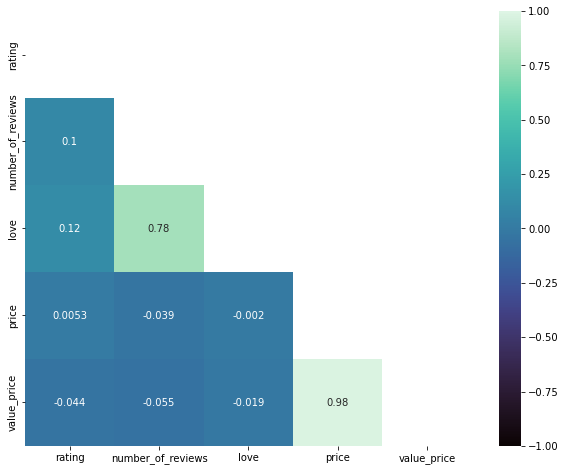

In [13]:
# Creamos un heatmap para visualizar la correlación.

mask = np.triu(np.ones_like(numericas.corr(), dtype = np.bool_))
sns.heatmap(numericas.corr(), annot = True, mask = mask, vmax = 1, vmin = -1, cmap = 'mako');

In [14]:
# Podemos comprobar que hay una alta correlación entre el "price" y "value_price", por lo que decidimos eliminar esta segunda.

df.drop("value_price", axis = 1, inplace = True)

<Figure size 720x720 with 0 Axes>

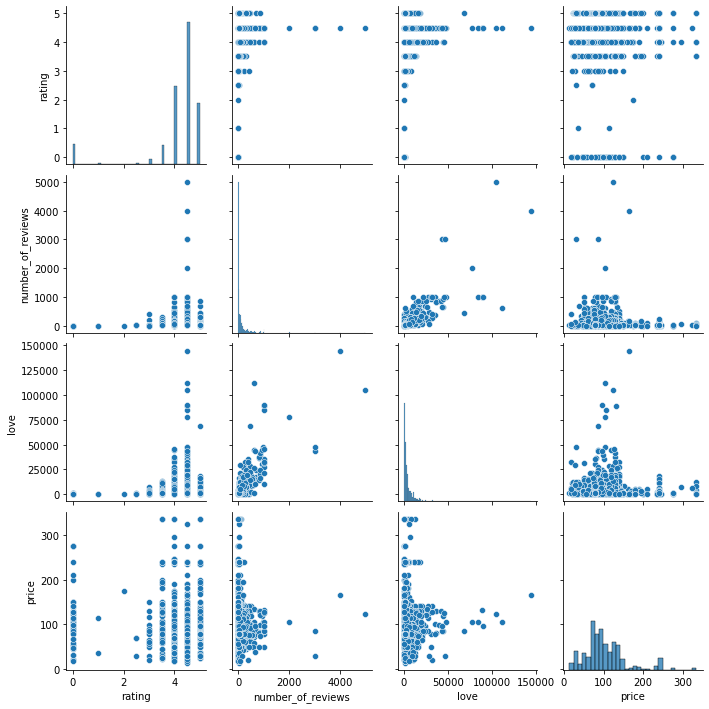

In [15]:
# Vamos a realizar un pairplot para ver la relación entre todas las variables.

plt.figure(figsize = (10, 10))

sns.pairplot(df);

4. Guardad la gráfica del heatmap.

Guardada en `"../imagenes/"heatmap.png"`

# Regresión Lineal IV. Asunciones

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

El objetivo de este pairprgramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. Cada asunción la deberéis testar de forma visual y analítica.

- Normalidad 

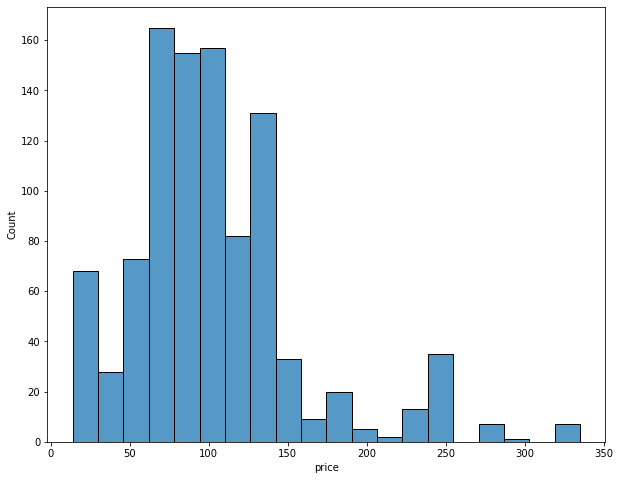

In [16]:
# Realizamos un histplot de nuestra variable respuesta para analizar el supuesto de normalidad.

sns.histplot(x = df["price"], bins = 20);

Como se puede observar en la gráfica, nuestra variable respuesta no es normal.

In [17]:
# Lo comprobamos analíticamente y nuestro p-valor es muy cercano a cero, por lo que se confirma.

stats.shapiro(df["price"]) 

ShapiroResult(statistic=0.8909474611282349, pvalue=7.083343537946002e-26)

- Homogeneidad de varianzas

In [18]:
df.head(1)

,brand,category,rating,number_of_reviews,love,price,online_only,exclusive,limited_edition,limited_time_offer
0,Acqua Di Parma,Fragrance,4.0,4,3002,66.0,Yes,No,No,No


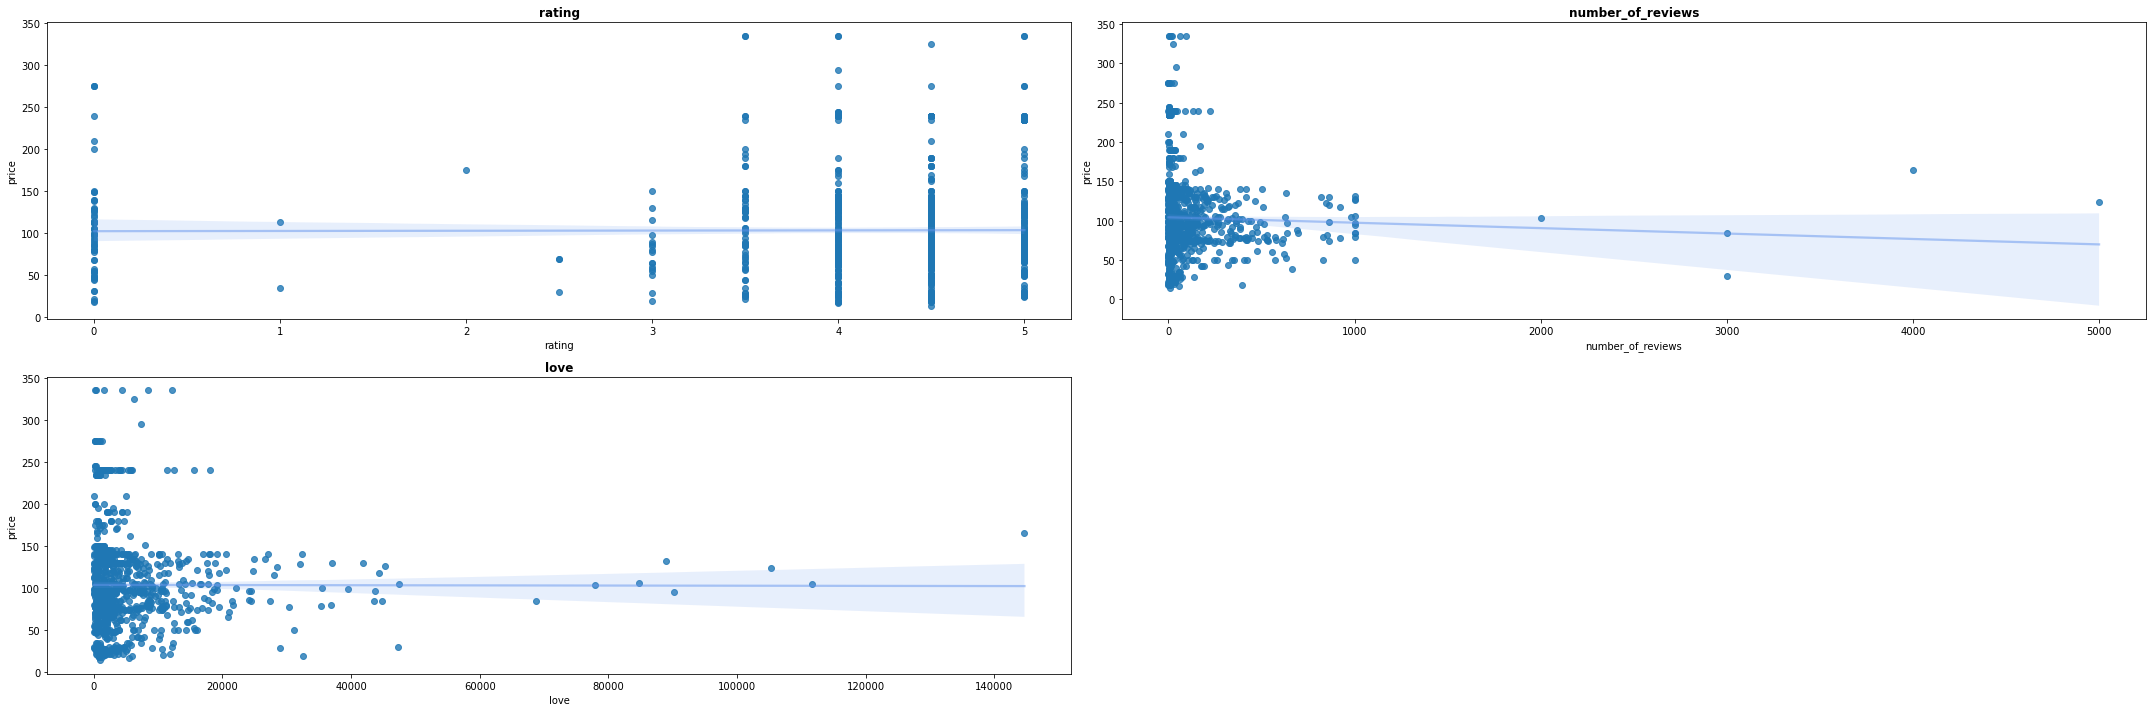

In [19]:
# Nos interesan las variables predictoras.

fig, axes = plt.subplots(2, 2, figsize = (30, 10))

axes = axes.flat

numericas.drop("value_price", axis = 1, inplace = True)

for i, columna in enumerate(numericas): 
    sns.regplot(
        data = df,
        x = columna,
        y = "price",
        line_kws = {"color": "cornflowerblue", "alpha": 0.5}, 
        ax = axes[i])

    axes[i].set_title(columna, fontweight = "bold")

fig.delaxes(axes[-1]) # quitamos la última porque es la variable respuesta

fig.tight_layout();

In [20]:
# Vamos acomprobarlo analíticamente con el test Levene.

numericas_col = df.select_dtypes(include = np.number).drop("price", axis = 1).columns

resultados = {}

for col in numericas_col:
    statistic, p_val = levene(df[col], df.price, center = "median")
    resultados[col] = p_val

resultados

{'rating': 4.758065861786118e-158,
 'number_of_reviews': 1.1776203444864847e-13,
 'love': 3.218258582046182e-40}

Hemos utilizado el test de Levene porque nuestros datos no son normales y el test de Levene es más robusto ante la falta de normalidad. Como se puede observar, todos nuestros datos numéricos son heterocedásticos. 

A continuación, vamos a comprobar las categóricas:

Para muchas de las columnas categóricas, tenemos muchas categorías diferentes, por lo que inevitablemente que nuestros datos van a ser heterocedásticos. Por lo tanto, hemos optado por no hacerlos, ya que los boxplots no son nada visuales. A continuación, si realizamos los que son visuales.

- Columna exclusive

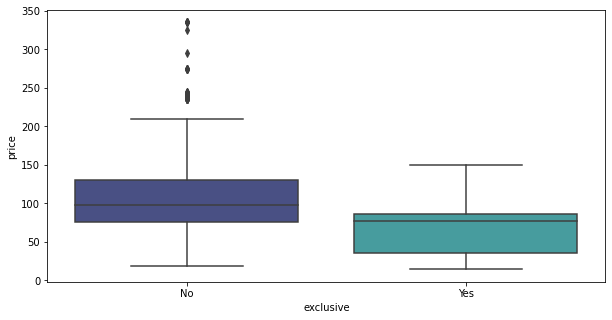

In [21]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))

sns.boxplot(x = "exclusive", y = "price", data = df, palette = "mako", ax = ax);

- Columna online_only

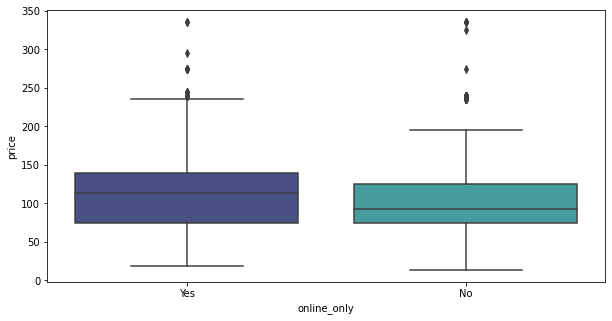

In [22]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))

sns.boxplot(x = "online_only", y = "price", data = df, palette = "mako", ax = ax);

- Columna limited_edition

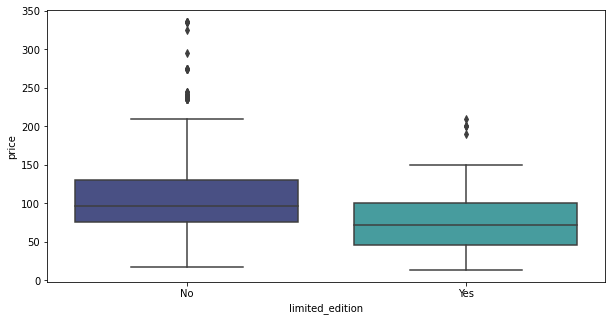

In [23]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))

sns.boxplot(x = "limited_edition", y = "price", data = df, palette = "mako", ax = ax);

- Columna limited_time_offer

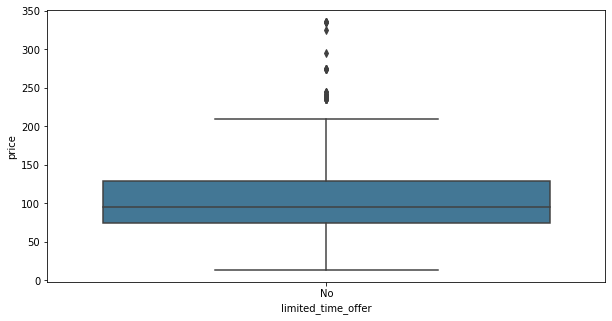

In [24]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 5))

sns.boxplot(x = "limited_time_offer", y = "price", data = df, palette = "mako", ax = ax);

In [25]:
# Observando el boxplot decidimos eliminar la columna "limited_time_offer" porque solamente tenemos una única categoría y, por lo tanto, no nos da ninguna información.

df.drop("limited_time_offer", axis = 1, inplace = True)

In [26]:
# Resultados del test de Levene para verlo analíticamente.

columnas_cat = ["exclusive", "online_only", "limited_edition"]

for columna in columnas_cat:
    cat1 = df[df[columna] == "Yes"]["price"]
    cat2 = df[df[columna] == "No"]["price"]     
    
    print(f"Los resultados para la columna {columna} son {stats.levene(cat1, cat2, center = 'median')}")

Los resultados para la columna exclusive son LeveneResult(statistic=7.459321072004937, pvalue=0.006423174081944704)
Los resultados para la columna online_only son LeveneResult(statistic=16.640805626306335, pvalue=4.8803525446017615e-05)
Los resultados para la columna limited_edition son LeveneResult(statistic=1.6851710590920177, pvalue=0.19454139892341307)


Como conclusión, visualmente habiamos visto que las columnas que hemos analizado eran homocedásticas y el test de Levene nos lo confirma. No obstante, hemos visto más arriba que íbamos a tener columnas que inevitablemente son heterocedásticas, como por ejemplo la columna "brand". Tendremos que tenerlo en cuenta o no para realizar el algoritmo de regresión lineal.

- Independencia de las variables

In [27]:
# Creamos un DataFrame con las variables categóricas.

predictoras_cat = df.select_dtypes(include = 'object')
predictoras_cat.head(1)

,brand,category,online_only,exclusive,limited_edition
0,Acqua Di Parma,Fragrance,Yes,No,No


In [28]:
# Creamos una variable con con las variables predictoras categóricas, eliminando la variable respuesta.

combinaciones = list(combinations(predictoras_cat, 2))

for i in combinaciones:
    crosstab, test_results, expected = rp.crosstab(predictoras_cat[i[0]], predictoras_cat[i[1]],
                                                    test = "chi-square",
                                                    expected_freqs = True,
                                                    prop = "cell")
    print(f"La V de Cramer para la combinación {i} es {test_results.loc[2][1]}") # Que imprima únicamente la V de Cramer de cada combinación
                            

La V de Cramer para la combinación ('brand', 'category') es 0.3767
La V de Cramer para la combinación ('brand', 'online_only') es 0.6512


La V de Cramer para la combinación ('brand', 'exclusive') es 0.6222
La V de Cramer para la combinación ('brand', 'limited_edition') es 0.3887
La V de Cramer para la combinación ('category', 'online_only') es 0.2002
La V de Cramer para la combinación ('category', 'exclusive') es 0.3785
La V de Cramer para la combinación ('category', 'limited_edition') es 0.6355
La V de Cramer para la combinación ('online_only', 'exclusive') es 0.0284
La V de Cramer para la combinación ('online_only', 'limited_edition') es 0.1694
La V de Cramer para la combinación ('exclusive', 'limited_edition') es 0.2888


Si la V de Cramer es cercano a 0, indica que son dos variables independientes, y si es cercano a 1 son variables altamente dependientes. Por lo tanto, se puede ver que nuestras variables son independientes entre sí, a excepción de "brand"-"online_only", "brand"-"exclusive" y "category"-"limited_edition".

In [29]:
# Creamos un DataFrame con solo las variables numéricas predictoras para ver la correlación de Pearson y comprobar si son independientes o no.

numericas2 = numericas.drop("price", axis = 1)

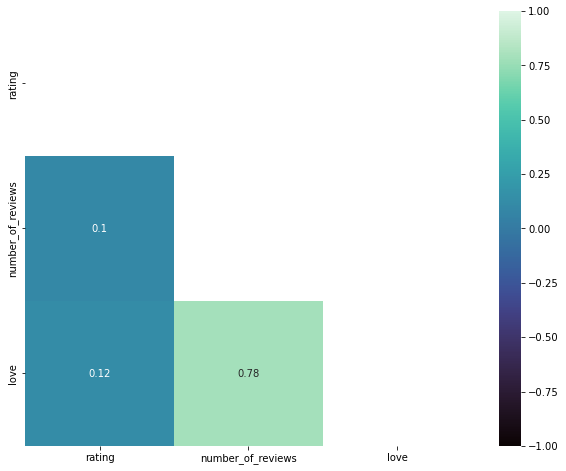

In [30]:
# Creamos el heatmap para verlo visualmente.

mask = np.triu(np.ones_like(numericas2.corr(), dtype = np.bool_))
sns.heatmap(numericas2.corr(), annot = True, mask = mask, vmax = 1, vmin = -1, cmap = 'mako');

Como podemos comprobar, tenemos una cierta correlación entre "love" y "number_of_reviews". Por lo que no serían del todo independientes la una de la otra.

In [31]:
# Guardamos el archivo con las modificaciones.

df.to_csv("../data/sephora2.csv")